In [1]:
from DP.dca_global import dca_global
from DP.linear_solver import linear_solver
from DP.dca_mit import dca_mit
from DP.DP_tester import DP_tester
from DP.utils import print_matrix, binom_optimal_privacy, fisher_information_privatized

The crux of this algorithm is the following update rule:

$$ x^{(k+1)} \in argmin_{x \in C} (g(x) - (h(x^{(k)}) + \langle \nabla h(x^{(k)}), x - x^{(k)} \rangle)). $$

This should be similar to a line search restricted onto the feasible set, or something similar. Definitely look into it.

## Bernoulli distribution

In [16]:
N = 1
THETA = 0.5
EPSILON = 1.0

opt_q, status, history = binom_optimal_privacy(dca_global(), N, EPSILON, THETA)

print(status)
print_matrix(opt_q)

Converged after 3 iteratons.
row 0: 0.7310585786284065	0.26894142137013
row 1: 0.2689414213715935	0.73105857862987


## Binomial with two tries, $n=2, \epsilon=1.0$

In [3]:
N = 2
THETA = 0.3
EPSILON = 1.0

opt_q, status, history = binom_optimal_privacy(dca_global(), N, EPSILON, THETA)

print(status)
print_matrix(opt_q)

Converged after 3 iteratons.
row 0: 0.26894142134255805	0.7310585785554222	0.7310585785509268
row 1: 0.7310585785889794	0.26894142137611426	0.2689414213116255


## $n = 2, \epsilon = 2$

In [4]:
N = 2
THETA = 0.5
EPSILON = 2.0

opt_q, status, history = binom_optimal_privacy(dca_global(), N, EPSILON, THETA)

print(status)
print_matrix(opt_q)

Converged after 8 iteratons.
row 0: 0.8807970779776166	0.11920292239650682	0.1192029220222475
row 1: 0.1192029220222592	0.8807970776033529	0.8807970779776166


/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/DP/utils.py:176: RuntimeWarning: invalid value encountered in divide
  return np.sum(numerator / denominator)
/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/DP/utils.py:103: RuntimeWarning: invalid value encountered in scalar divide
  gradient_matrix[i][j] = 2 * p_theta_dot[
/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/DP/utils.py:105: RuntimeWarning: invalid value encountered in scalar divide
  ] * Q_ptheta_dot / Q_ptheta - p_theta[j] * np.power(


## $n=1$ and $n=2$ optimal fisher information

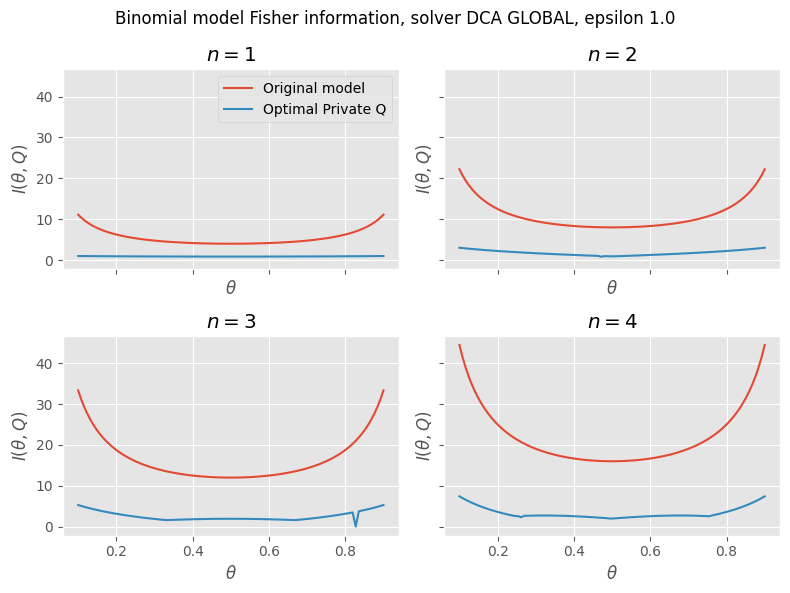

In [5]:
DP_tester.plot_fisher_infos(dca_global(), ns=[1, 2, 3, 4], epsilon=1.0)

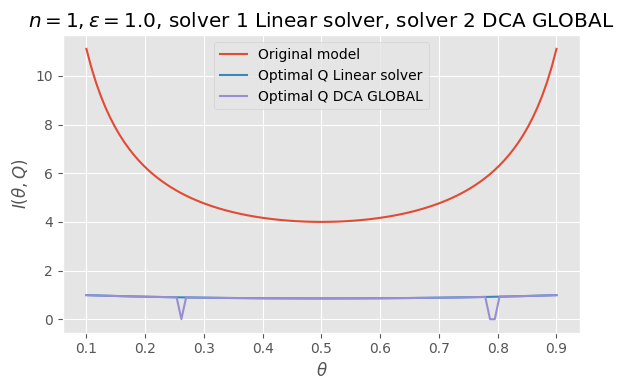

In [6]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_global(), 1, 1.0)

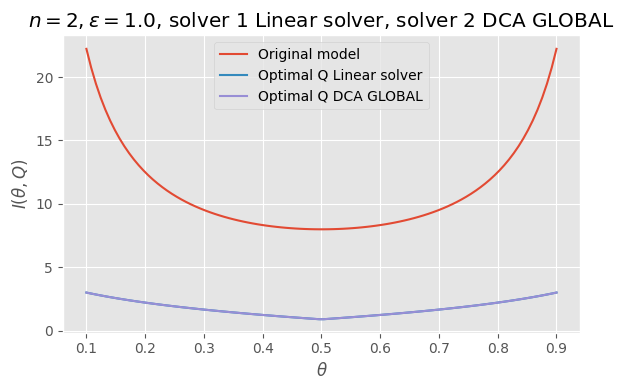

In [7]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_global(), 2, 1.0)

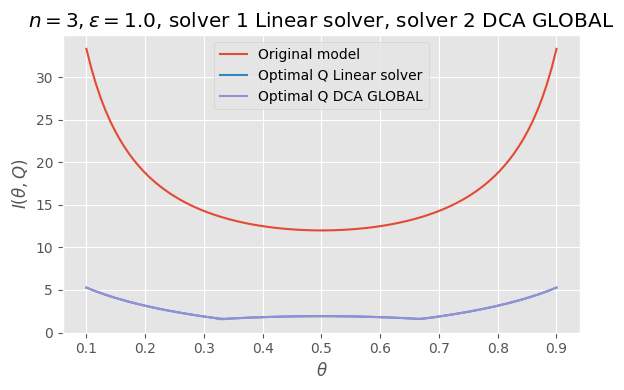

In [8]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_global(), 3, 1.0)

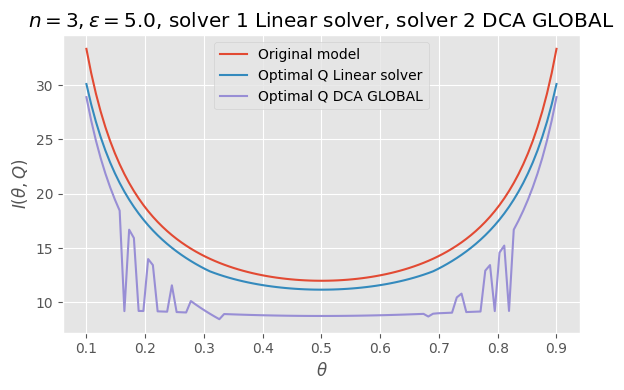

In [9]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_global(), 3, 5.0)

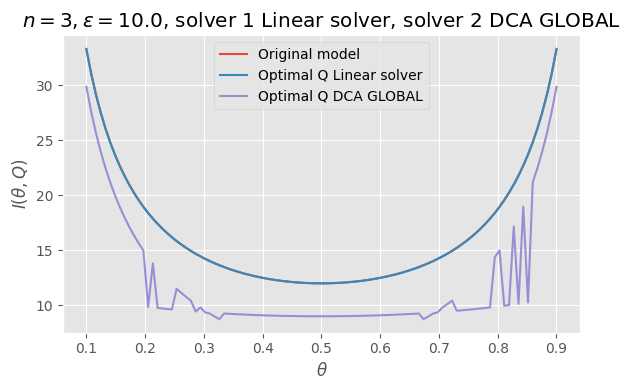

In [21]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_global(), 3, 10.0)

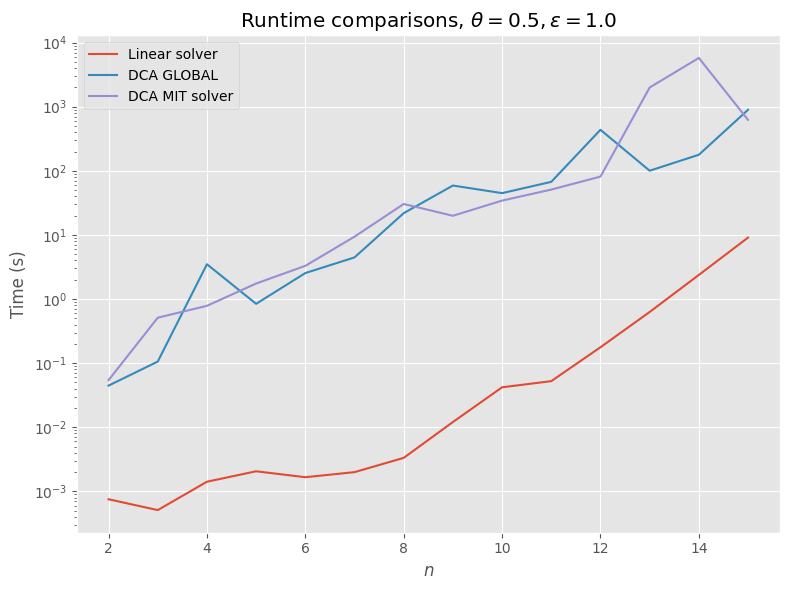

In [22]:
DP_tester.compare_runtimes([linear_solver(), dca_global(), dca_mit()], [i for i in range(2, 16)], 0.5, 1.0, log=True)

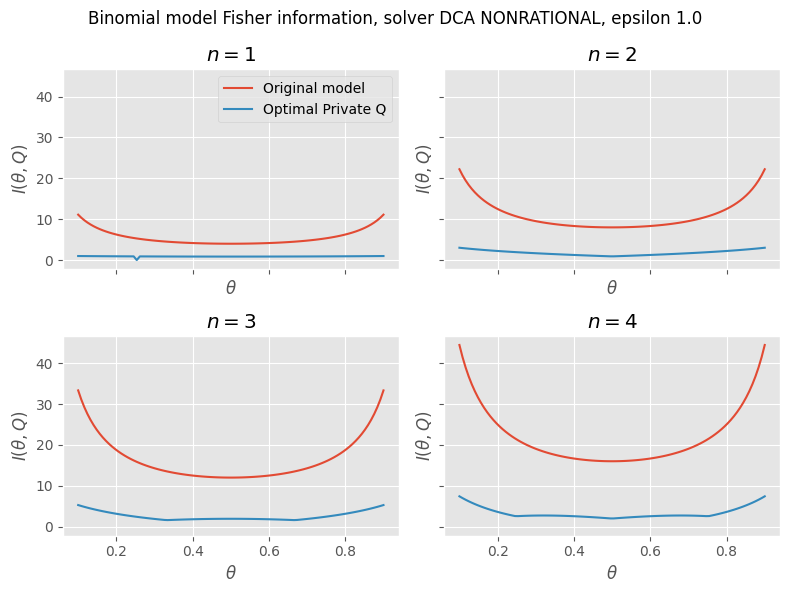

In [10]:
from DP.dca_nonrational import dca_nonrational

DP_tester.plot_fisher_infos(dca_nonrational(), ns=[1, 2, 3, 4], epsilon=1.0)

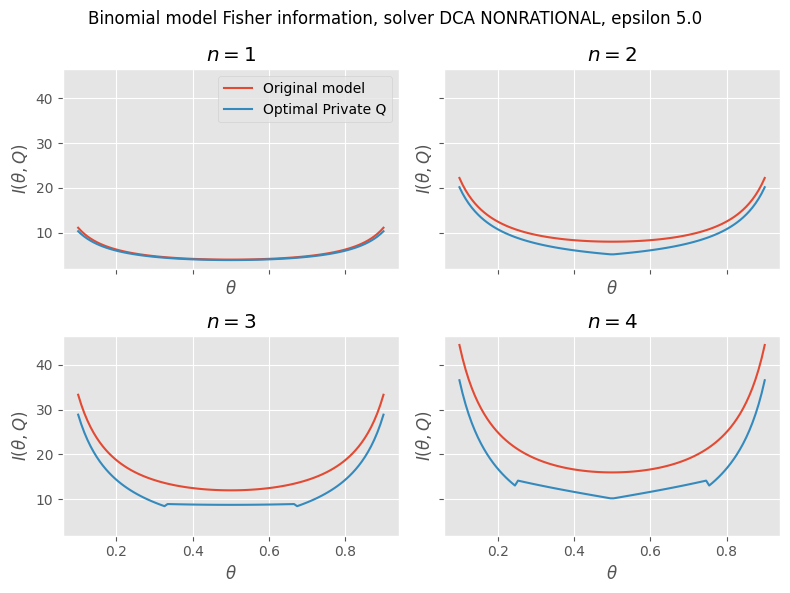

In [11]:
DP_tester.plot_fisher_infos(dca_nonrational(), ns=[1, 2, 3, 4], epsilon=5.0)

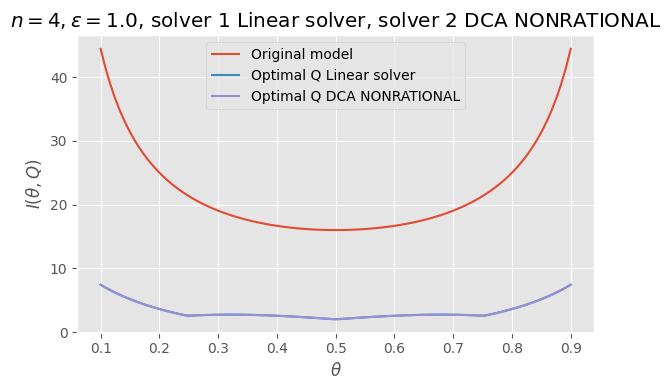

In [12]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_nonrational(), 4, 1.0)

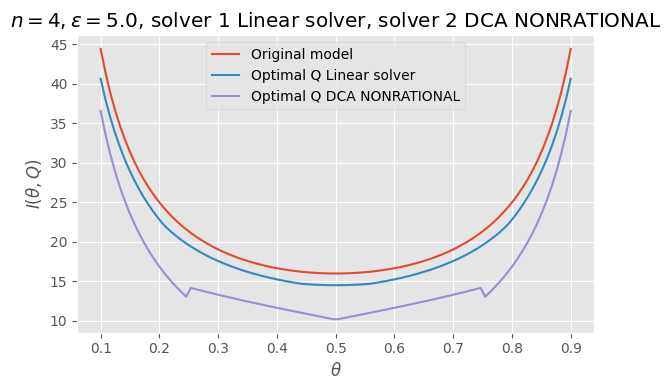

In [13]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_nonrational(), 4, 5.0)

/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/DP/utils.py:176: RuntimeWarning: invalid value encountered in divide
  return np.sum(numerator / denominator)


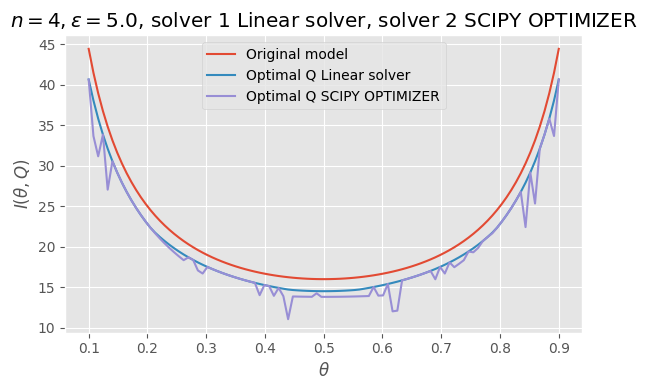

In [2]:
from DP.scipy_optimizer import scipy_optimizer

DP_tester.compare_fisher_two_solvers(linear_solver(), scipy_optimizer(), 4, 5.0)

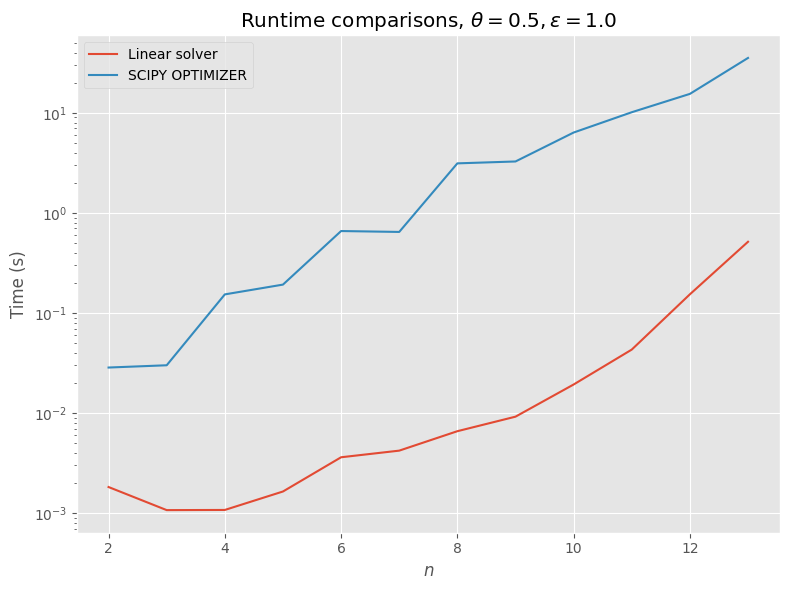

In [3]:
DP_tester.compare_runtimes([linear_solver(), scipy_optimizer()], [i for i in range(2, 14)], 0.5, 1.0, log=True)

In [17]:
q, status, history = binom_optimal_privacy(dca_global(), 2, 5.0, 0.5)

In [18]:
history

[array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[0.33761675, 0.3358688 , 0.33558839],
        [0.33195726, 0.3324206 , 0.32823734],
        [0.33042598, 0.3317106 , 0.33617427]]),
 array([[0.00224673, 0.33344409, 0.00224673],
        [0.00667781, 0.31944053, 0.99107546],
        [0.99107546, 0.34711538, 0.00667781]]),
 array([[2.09150391e-13, 2.12968118e-13, 1.88689912e-13],
        [9.93307149e-01, 9.93307149e-01, 6.69285092e-03],
        [6.69285092e-03, 6.69285092e-03, 9.93307149e-01]]),
 array([[6.74460487e-14, 5.69544412e-14, 0.00000000e+00],
        [6.69285123e-03, 6.69285152e-03, 9.93307148e-01],
        [9.93307149e-01, 9.93307148e-01, 6.69285152e-03]]),
 array([[6.69285093e-03, 6.69285093e-03, 9.93307149e-01],
        [9.93307149e-01, 9.93307149e-01, 6.69285093e-03],
        [1.74950787e-12, 1.47710761e-12, 6.13110951e-12]]),
 array([[9.93307148e-01, 9.93307148e-01, 6.69285150e

In [4]:
for mat in history:
    fish = fisher_information_privatized(mat, 2, 0.5)
    print(fish)
print(fisher_information_privatized(q, 2, 0.5))

7.6333124623606325
3.8936465247551837
5.14589452642693
5.145894514351787
5.145894526436421
5.145894509073202
5.145894509072905


In [9]:
opt_q = binom_optimal_privacy(linear_solver(), 2, 5.0, 0.5)[0]
print(fisher_information_privatized(opt_q, 2, 0.5))

7.6333124623606325


In [15]:
binom_optimal_privacy(dca_nonrational(), 4, 5.0, 0.1)

(array([[0.99330715, 0.00669285, 0.00669285, 0.00669285, 0.00669285],
        [0.00669285, 0.99330715, 0.99330715, 0.99330715, 0.99330715]]),
 'Converged after 4 iterations.',
 [array([[0.2, 0.2, 0.2, 0.2, 0.2],
         [0.2, 0.2, 0.2, 0.2, 0.2],
         [0.2, 0.2, 0.2, 0.2, 0.2],
         [0.2, 0.2, 0.2, 0.2, 0.2],
         [0.2, 0.2, 0.2, 0.2, 0.2]]),
  array([[0.19512744, 0.20184092, 0.20057827, 0.19574942, 0.20371482],
         [0.20286761, 0.19283772, 0.19941926, 0.20037917, 0.20394797],
         [0.19537745, 0.2037015 , 0.19445433, 0.19744064, 0.20194814],
         [0.21248942, 0.20341259, 0.19675294, 0.20050707, 0.19796721],
         [0.19413808, 0.19820727, 0.2087952 , 0.20592371, 0.19242186]]),
  array([[0.00000000e+00, 1.27923858e-15, 1.26776522e-15, 3.83352730e-15,
          5.91785540e-14],
         [2.93371960e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         

In [16]:
binom_optimal_privacy(linear_solver(), 4, 5.0, 0.1)

(array([[0.00664835, 0.00664835, 0.98670329, 0.98670329, 0.98670329],
        [0.00664835, 0.98670329, 0.00664835, 0.00664835, 0.00664835],
        [0.98670329, 0.00664835, 0.00664835, 0.00664835, 0.00664835]]),
 'Converged',
 None)